In [21]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

In [22]:
df = pd.read_csv('Cleaned_Lung_Cancer_dataset.csv')
df

,Age,Tumor Location,Cancer Cell Type,Tumor Extent at Diagnosis,Regional Lymph Node Involvement,Metastatic Spread,Tumor Laterality,Extent of Regional Lymph Node Surgery,Treatment Plan,Days from Diagnosis to Treatment,Cause of Death
0,50-79 years,Upper lobe,"NSCLC-Adenocarcinoma, NOS",Pleural Involvement/Lung Collapse,Ipsilateral Nodes Only,No Distant Metastasis,Right,4+ Nodes Removed,Chemotherapy after Surgery,58.0,Alive or Not Cancer-related
1,50-79 years,Upper lobe,"NSCLC-Adenocarcinoma, NOS",Localized/Early disease,No Nodal Involvement,No Distant Metastasis,Right,Unknown/Inapplicable,Unknown Treatment,45.0,Alive or Not Cancer-related
2,85+ years,Lower lobe,"NSCLC-Adenocarcinoma, NOS",Localized/Early disease,No Nodal Involvement,No Distant Metastasis,Left,4+ Nodes Removed,Surgery,23.0,Alive or Not Cancer-related
3,50-79 years,Upper lobe,"NSCLC-Squamous, NOS",Spread within Lung,No Nodal Involvement,No Distant Metastasis,Right,Regional Biopsy/aspiration only,Radiotherapy after Surgery,148.0,Alive or Not Cancer-related
4,50-79 years,Not Specified,Other / Rare,Unknown,Unknown Node Status,Distant Lymph Node,Unspecified,Unknown/Inapplicable,Chemotherapy,57.0,Cancer
...,...,...,...,...,...,...,...,...,...,...,...
193214,50-79 years,Not Specified,"Malignant Tumor Cells, NOS",Unknown,Unknown Node Status,Unknown,Unspecified,Unknown/Inapplicable,Unknown Treatment,NaN,Cancer
193215,80-84 years,Not Specified,"Malignant Tumor Cells, NOS",Unknown,Unknown Node Status,Unknown,Unspecified,Unknown/Inapplicable,Unknown Treatment,NaN,Cancer
193216,85+ years,Not Specified,"Malignant Tumor Cells, NOS",Unknown,Unknown Node Status,Unknown,Unspecified,Unknown/Inapplicable,Unknown Treatment,NaN,Cancer
193217,50-79 years,Not Specified,"Malignant Tumor Cells, NOS",Unknown,Unknown Node Status,Unknown,Unspecified,Unknown/Inapplicable,Unknown Treatment,NaN,Cancer


In [23]:
def test_independence_association(df, col1, col2):

    table = pd.crosstab(df[col1], df[col2])
    
    chi2, p, dof, expected = chi2_contingency(table)
    
    n = table.sum().sum()
    phi2 = chi2 / n
    r, k = table.shape
    cramers_v = np.sqrt(phi2 / min(k - 1, r - 1))

    print(f"p_value: {p}\ncramers_v: {cramers_v}" )

In [24]:
test_independence_association(df, 'Age', 'Cause of Death')

pd.crosstab(df['Age'], df['Cause of Death'], normalize='index')

p_value: 0.0
cramers_v: 0.06667401899494946


Cause of Death,Alive or Not Cancer-related,Cancer,Not Applicable,Unknown
Age,,,,
00-49 years,0.661044,0.329719,0.000000,0.009237
50-79 years,0.576067,0.417453,0.000061,0.006419
80-84 years,0.505851,0.489239,0.000046,0.004864
85+ years,0.396988,0.596843,0.000111,0.006058


In [27]:
test_independence_association(df, 'Tumor Location', 'Cause of Death')

pd.crosstab(df['Tumor Location'], df['Cause of Death'], normalize='index')

p_value: 0.0
cramers_v: 0.12996958969401898


Cause of Death,Alive or Not Cancer-related,Cancer,Not Applicable,Unknown
Tumor Location,,,,
Lower lobe,0.609165,0.385187,0.000058,0.005590
Main bronchus,0.368799,0.621054,0.000000,0.010147
Middle lobe,0.642619,0.351181,0.000119,0.006082
Not Specified,0.309995,0.682698,0.000141,0.007167
Overlapping lesion,0.472103,0.520386,0.000000,0.007511
Upper lobe,0.603651,0.390206,0.000042,0.006102


In [26]:
test_independence_association(df, 'Cancer Cell Type', 'Cause of Death')

pd.crosstab(df['Cancer Cell Type'], df['Cause of Death'], normalize='index')

p_value: 0.0
cramers_v: 0.15904656865260883


Cause of Death,Alive or Not Cancer-related,Cancer,Not Applicable,Unknown
Cancer Cell Type,,,,
"Carcinoma, NOS",0.412953,0.580476,0.000119,0.006452
"Malignant Tumor Cells, NOS",0.329651,0.664246,0.000000,0.006104
NSCLC-Adenocarcinoma w/ Mixed Subtypes,0.845151,0.151589,0.000000,0.003260
"NSCLC-Adenocarcinoma, NOS",0.609384,0.384003,0.000074,0.006539
NSCLC-Adenosquamous Carcinoma,0.590608,0.403371,0.000000,0.006020
NSCLC-Large Cell Neuroendocrine Carcinoma,0.511713,0.483163,0.000000,0.005124
NSCLC-NOS,0.499301,0.492943,0.000254,0.007502
NSCLC-Papillary Predominant Adenocarcinoma,0.872150,0.127036,0.000000,0.000814
NSCLC-Solid Predominant Adenocarcinoma,0.863901,0.131732,0.000000,0.004367


In [30]:
test_independence_association(df, 'Tumor Extent at Diagnosis', 'Cause of Death')

pd.crosstab(df['Tumor Extent at Diagnosis'], df['Cause of Death'], normalize='index')

p_value: 0.0
cramers_v: 0.17671676719669333


Cause of Death,Alive or Not Cancer-related,Cancer,Not Applicable,Unknown
Tumor Extent at Diagnosis,,,,
Localized/Early disease,0.692615,0.302197,0.000065,0.005124
Major Adjacent Structure Invasion,0.366222,0.624161,0.000000,0.009618
Occult/Hidden Tumors,0.462759,0.528694,0.000000,0.008547
Pleural Invasion/Chest Wall Invasion/Same Lobe Nodules,0.525688,0.467687,0.000074,0.006551
Pleural Involvement/Lung Collapse,0.571166,0.423328,0.000051,0.005455
Rare/Other Extensions,0.600000,0.350000,0.000000,0.050000
Rib/Muscle/Sternum Invasion,0.378223,0.615568,0.000000,0.006208
Spread within Lung,0.426536,0.565516,0.000000,0.007948
Unknown,0.299993,0.692310,0.000146,0.007551


In [29]:
test_independence_association(df, 'Regional Lymph Node Involvement', 'Cause of Death')

pd.crosstab(df['Regional Lymph Node Involvement'], df['Cause of Death'], normalize='index')

p_value: 0.0
cramers_v: 0.203964176178655


Cause of Death,Alive or Not Cancer-related,Cancer,Not Applicable,Unknown
Regional Lymph Node Involvement,,,,
Bilateral / Contralateral,0.380654,0.610840,0.000000,0.008506
Ipsilateral / Contralateral,0.400256,0.591951,0.000233,0.007561
Ipsilateral Nodes Only,0.577917,0.416465,0.000000,0.005618
Mediastinal Ipsilateral,0.427639,0.563772,0.000021,0.008569
No Nodal Involvement,0.738365,0.257200,0.000072,0.004364
"Node Involvement, NOS",0.384113,0.606094,0.000000,0.009793
Not Applicable,0.857143,0.142857,0.000000,0.000000
"Regional Node Involvement, NOS",0.854808,0.142308,0.000000,0.002885
Unknown Node Status,0.289133,0.703956,0.000139,0.006771


In [32]:
test_independence_association(df, 'Metastatic Spread', 'Cause of Death')

pd.crosstab(df['Metastatic Spread'], df['Cause of Death'], normalize='index')

p_value: 0.0
cramers_v: 0.24501122443745912


Cause of Death,Alive or Not Cancer-related,Cancer,Not Applicable,Unknown
Metastatic Spread,,,,
Distant Lymph Node,0.376979,0.613326,0.000065,0.009630
"Distant Metastasis, NOS",0.248701,0.739522,0.000000,0.011777
Entry Error,0.613128,0.381371,0.000000,0.005501
Lung,0.414983,0.577128,0.000000,0.007889
No Distant Metastasis,0.736956,0.258428,0.000085,0.004531
Other Specified Distant Metastasis,0.309351,0.681824,0.000048,0.008777
Unknown,0.057575,0.942215,0.000000,0.000210


In [33]:
test_independence_association(df, 'Tumor Laterality', 'Cause of Death')

pd.crosstab(df['Tumor Laterality'], df['Cause of Death'], normalize='index')

p_value: 0.0
cramers_v: 0.10909833864197548


Cause of Death,Alive or Not Cancer-related,Cancer,Not Applicable,Unknown
Tumor Laterality,,,,
Bilateral,0.407331,0.583893,0.000516,0.008260
Inapplicable,0.388601,0.606218,0.000000,0.005181
Left,0.581235,0.412514,0.000068,0.006184
"Only One Side, NOS",0.336570,0.653722,0.000000,0.009709
Right,0.579601,0.413939,0.000048,0.006411
Unspecified,0.209937,0.784543,0.000079,0.005442


In [35]:
test_independence_association(df, 'Extent of Regional Lymph Node Surgery', 'Cause of Death')

pd.crosstab(df['Extent of Regional Lymph Node Surgery'], df['Cause of Death'], normalize='index')

p_value: 0.0
cramers_v: 0.1994946226439343


Cause of Death,Alive or Not Cancer-related,Cancer,Not Applicable,Unknown
Extent of Regional Lymph Node Surgery,,,,
1-3 Nodes Removed,0.857853,0.139771,0.000000,0.002376
4+ Nodes Removed,0.913812,0.084385,0.000032,0.001771
"Node(s) Removed, NOS",0.833333,0.162675,0.000000,0.003992
Regional Biopsy/aspiration only,0.522599,0.469929,0.000000,0.007473
Sentinel Biopsy + Dissection,0.893617,0.106383,0.000000,0.000000
Sentinel Biopsy only,0.530864,0.469136,0.000000,0.000000
Unknown/Inapplicable,0.461226,0.531401,0.000084,0.007290


In [36]:
test_independence_association(df, 'Treatment Plan', 'Cause of Death')

pd.crosstab(df['Treatment Plan'], df['Cause of Death'], normalize='index')

p_value: 0.0
cramers_v: 0.23295105092607893


Cause of Death,Alive or Not Cancer-related,Cancer,Not Applicable,Unknown
Treatment Plan,,,,
Chemotherapy,0.479124,0.513508,0.000000,0.007368
Chemotherapy after Surgery,0.678952,0.316140,0.000000,0.004908
Chemotherapy and Radiotherapy,0.548815,0.444909,0.000039,0.006237
Chemotherapy and Radiotherapy after Surgery,0.558602,0.434905,0.000000,0.006492
Chemotherapy before Surgery,0.856016,0.138067,0.000000,0.005917
Other,0.648721,0.343652,0.000000,0.007627
Radiotherapy,0.654810,0.339659,0.000181,0.005350
Radiotherapy after Surgery,0.513379,0.478231,0.000000,0.008390
Radiotherapy and Chemotherapy before Surgery,0.751462,0.242690,0.000000,0.005848


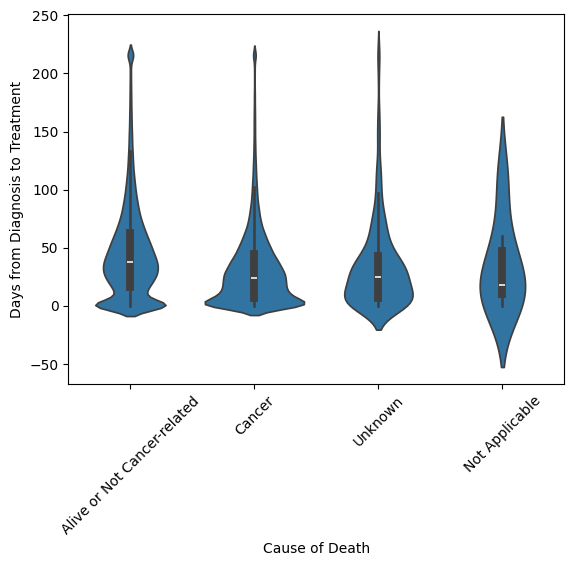

In [44]:
# Clip Days from Diagnosis to Treatment at 1st and 99th percentile
lower = df['Days from Diagnosis to Treatment'].quantile(0.01)
upper = df['Days from Diagnosis to Treatment'].quantile(0.99)

df_clipped = df.copy()
df_clipped['Days from Diagnosis to Treatment'] = df_clipped['Days from Diagnosis to Treatment'].clip(lower, upper)

sns.violinplot(x='Cause of Death', y='Days from Diagnosis to Treatment', data=df_clipped)
plt.xticks(rotation=45)
plt.show()